## Cubic Splines and Bezier curves


### Cubic splines

Take-aways

- Cubic spline
  - What are splines?
  - How to find cubic splines
  - Advantage of cubic splines

#### What are splines?

**Summary**

- A spline is a collection of low-order polynomials glued together.
  - Each piece is defined as a piece-wise polynomial over an interval.
  - Every piece is $a+bx$ form --> linear spline
  - Every piece is $a+bx+cx^2+bx^3$ form --> cubic spline

![Linear spline](https://media.geeksforgeeks.org/wp-content/uploads/20210622130721/linearinterpolation-660x426.JPG)

Figure: Geeksforgeeks (linear spline)

![Cubic spline](https://pythonnumericalmethods.studentorg.berkeley.edu/_images/17.03.01-Illustration_of_cubic_interpolation.jpg)

Figure: Python Programming And Numerical Methods (Cubic spline)

#### Why do we care?

**Motivation**

- Recall Runge's phenomenon. ![Runge's phenomenon](https://www.johndcook.com/runge_cauchy.svg) 
  - One way to alleviate this problem is to Chebyshev nodes: using denser nodes towards the end points. 
- **New idea**: use several formulas rather than a single one.

#### How to find a cubic spline?

**Remark**

- We focus on cubic spline
  - This is just because we are already familiar with linear splines. (Just connect the dots, i.e., piece-wise linear functions). They are very important objects too.

##### Characterization

Give a set of data points $D=\{(x_1, y_1), \cdots, (x_n, y_n)\}$ with $x_i$'s are all distinct, let $S:I\to \mathbb{R}$ be a cubic spline, where $I=[x_1, x_n]$. We want the following.

1. $S$ passes through all the data points.
2. $S$ is continuous.
3. $S$ is smooth over the whole interval. ($C^1$ function)
4. (Not obvious) $S$ is curvature-smooth. ($C^2$ function)

'Curvature-smooth' is not an official terminology, but I improvise it to share the idea.

In mathematical expressions, this characterization translates as follows.

- Form
  - $S$ has the form

$$
\begin{aligned}
& S_1(x)  =y_1+b_1\left(x-x_1\right)+c_1\left(x-x_1\right)^2+d_1\left(x-x_1\right)^3 &\text { on }\left[x_1, x_2\right] \\
& S_2(x)  =y_2+b_2\left(x-x_2\right)+c_2\left(x-x_2\right)^2+d_2\left(x-x_2\right)^3 &\text { on }\left[x_2, x_3\right] \\
& \vdots \\
& S_{n-1}(x)  =y_{n-1}+b_{n-1}\left(x-x_{n-1}\right)+c_{n-1}\left(x-x_{n-1}\right)^2+d_{n-1}\left(x-x_{n-1}\right)^3 & \text { on }\left[x_{n-1}, x_n\right]
\end{aligned}
$$

- Property
  1. $S_i\left(x_i\right)=y_i$ and $S_i\left(x_{i+1}\right)=y_{i+1}$ for $i=1, \ldots, n-1$.
  2. $S_{i-1}^{\prime}\left(x_i\right)=S_i^{\prime}\left(x_i\right)$ for $i=2, \ldots, n-1$.
  3. $S_{i-1}^{\prime \prime}\left(x_i\right)=S_i^{\prime \prime}\left(x_i\right)$ for $i=2, \ldots, n-1$

##### Degrees of freedom (d.o.f.)

- Degrees of freedom

| Free variable | d.o.f. | 
|---|---|
| $a_i=y_i$ | 0 |
| $b_i$ | $n-1$ |
| $c_i$ | $n-1$ |
| $d_i$ | $n-1$ |
| sum | $3n-3$ |

- Equalities

| Requirement | No. equations | 
|---|---|
| Property 1* | $n-1$ |
| Property 2 | $n-2$ |
| Property 3 | $n-2$ |
| sum | $3n-5$ |

*: 1st equality of Propert 1 is already met by settings $a_i=y_i$. Thus, only the 2nd equality contributes to the requirements.

- There are infinitely many cubic splines that satisfy the characterization.
  - To pin down a unique spline, we add two more equality conditions. There are many different kinds of cubic splines depending on the conditions additionally imposed.

#### Natural spline

A cubic spline that satisfies the following additional property is called the *natural* cubic spline.

- Property
  
  4a. $S_1^{\prime \prime}\left(x_1\right)=0$ and $S_{n-1}^{\prime \prime}\left(x_n\right)=0$. 

#### How to find cubic splines

- Here, we find the natural spline. Other splines differ only by the two additional equalities.

Step 1: translate the charaterization.

- 2nd equality of Property 1 ($n-1$ equations)

$$
\begin{gathered}
y_2=S_1\left(x_2\right)=y_1+b_1\left(x_2-x_1\right)+c_1\left(x_2-x_1\right)^2+d_1\left(x_2-x_1\right)^3 \\
\quad \vdots \\
y_n=S_{n-1}\left(x_n\right)=y_{n-1}+b_{n-1}\left(x_n-x_{n-1}\right)+c_{n-1}\left(x_n-x_{n-1}\right)^2 \\
\quad+d_{n-1}\left(x_n-x_{n-1}\right)^3 .
\end{gathered}
$$

- Property 2 ($n-2$ equations)

$$
\begin{aligned}
0= & S_1^{\prime}\left(x_2\right)-S_2^{\prime}\left(x_2\right)=b_1+2 c_1\left(x_2-x_1\right)+3 d_1\left(x_2-x_1\right)^2-b_2 \\
& \vdots \\
0= & S_{n-2}^{\prime}\left(x_{n-1}\right)-S_{n-1}^{\prime}\left(x_{n-1}\right)=b_{n-2}+2 c_{n-2}\left(x_{n-1}-x_{n-2}\right) \\
& +3 d_{n-2}\left(x_{n-1}-x_{n-2}\right)^2-b_{n-1},
\end{aligned}
$$

- Property 3 ($n-2$ equations)

$$
\begin{aligned}
0 & =S_1^{\prime \prime}\left(x_2\right)-S_2^{\prime \prime}\left(x_2\right)=2 c_1+6 d_1\left(x_2-x_1\right)-2 c_2 \\
& \vdots \\
0 & =S_{n-2}^{\prime \prime}\left(x_{n-1}\right)-S_{n-1}^{\prime \prime}\left(x_{n-1}\right)=2 c_{n-2}+6 d_{n-2}\left(x_{n-1}-x_{n-2}\right)-2 c_{n-1} .
\end{aligned}
$$

Step 2: Introduce convenient notations

- $\delta_i=x_{i+1}-x_i$ 
- $\Delta_i=y_{i+1}-y_i$
- $c_n=S_{n-1}^{\prime \prime}\left(x_n\right) / 2$
  - This is artificial: there is no $S_{n}(x)$, hence no $c_n$.
  - $c_n$ is assigned so that $d_i=(c_{i+1}-c_i)/(3 \delta_i)$ is still true for $i=n-1$ (see below). 
- Note that $a_i = y_i = S_{i}(x_{i})$, $b_i = S'_{i}(x_i)$, $c_i = S''_{i}(x_i)/2!$ and $d_i = S'''_{i}(x_i)/3!$. 

Step 3: System of equations in $c$'s (eliminate $d$'s, $b$'s)

- Solve for $d$'s
  - The equations from Property 3 involve only $c$'s and $d$'s. 
  - $i=n-1$ case is true because of $c_n=S_{n-1}^{\prime \prime}\left(x_n\right) / 2$.

$$
d_i=\frac{c_{i+1}-c_i}{3 \delta_i} \quad \text { for } i=1, \ldots, n-1 .
$$

- Solve for $b$'s
  - Solve equations from Property 1 for $b$', and plug $d$'s in. 

$$
\begin{aligned}
b_i & =\frac{\Delta_i}{\delta_i}-c_i \delta_i-d_i \delta_i^2 \\
& =\frac{\Delta_i}{\delta_i}-c_i \delta_i-\frac{\delta_i}{3}\left(c_{i+1}-c_i\right) \\
& =\frac{\Delta_i}{\delta_i}-\frac{\delta_i}{3}\left(2 c_i+c_{i+1}\right) \quad \text { for } i=1, \ldots, n-1 .
\end{aligned}
$$
<!-- for $i=1, \ldots, n-1$. -->

- Substitute $b$'s and $d$'s into the equations from Property 2, which results $n-2$ equations in $c_1, \ldots, c_n$ :

$$
\begin{aligned}
\delta_1 c_1+2\left(\delta_1+\delta_2\right) c_2+\delta_2 c_3 &= 3\left(\frac{\Delta_2}{\delta_2}-\frac{\Delta_1}{\delta_1}\right) \\
&\vdots \\
\delta_{n-2} c_{n-2}+2\left(\delta_{n-2}+\delta_{n-1}\right) c_{n-1}+\delta_{n-1} c_n &= 3\left(\frac{\Delta_{n-1}}{\delta_{n-1}}-\frac{\Delta_{n-2}}{\delta_{n-2}}\right) .
\end{aligned}
$$

Two more equations are given by the natural spline conditions (Property 4a):
$$
\begin{aligned}
S_1^{\prime \prime}\left(x_1\right) & =0 \rightarrow 2 c_1=0 \\
S_{n-1}^{\prime \prime}\left(x_n\right) & =0 \rightarrow 2 c_n=0 .
\end{aligned}
$$

Step 4: Matrix form

$$
\begin{aligned}
&\left[\begin{array}{cccccc}1 & 0 & 0 & & & \\ \delta_1 & 2 \delta_1+2 \delta_2 & \delta_2 & \ddots & & \\ 0 & \delta_2 & 2 \delta_2+2 \delta_3 & \delta_3 & & \\ & \ddots & \ddots & \ddots & \ddots & \\ & & & & & \\ & & & \delta_{n-2} & 2 \delta_{n-2}+2 \delta_{n-1} & \delta_{n-1} \\ & & & 0 & 0 & 1\end{array}\right]\left[\begin{array}{c}c_1 \\ \\ \\ \vdots \\ c_n\end{array}\right]
\\
&=\left[\begin{array}{c}
0 \\
3\left(\frac{\Delta_2}{\delta_2}-\frac{\Delta_1}{\delta_1}\right) \\
\vdots \\
3\left(\frac{\Delta_{n-1}}{\delta_{n-1}}-\frac{\Delta_{n-2}}{\delta_{n-2}}\right) \\
0
\end{array}\right] . \\
&
\end{aligned}
$$


Step 5: Compute solutions

After $c_1, \ldots, c_n$ are obtained from the matrix form, $b_1, \ldots, b_{n-1}$ and $d_1, \ldots, d_{n-1}$ are found from the formulas in Step 3.

**Algorithm** (Natural cubic spline)

- Given 
  - $x=\left[x_1, \ldots, x_n\right]$ where $x_1 < \cdots < x_n$
  - $y=\left[y_1, \ldots, y_n\right]$ 
- **for** $ i=1, \ldots, n-1$
  - $a_i=y_i$
  - $\delta_i=x_{i+1}-x_i$
  - $\Delta_i=y_{i+1}-y_i$
- Solve the above matrix equation for $c_1, \ldots, c_n$
- **for** $i=1, \ldots, n-1$
  - $d_i=\frac{c_{i+1}-c_i}{3 \delta_i}$
  - $b_i=\frac{\Delta_i}{\delta_i}-\frac{\delta_i}{3}\left(2 c_i+c_{i+1}\right)$
- Result

$$
S_i(x)=a_i+b_i\left(x-x_i\right)+c_i\left(x-x_i\right)^2+d_i\left(x-x_i\right)^3 \text { on }\left[x_i, x_{i+1}\right] \text { for } i=1, \ldots, n-1 .
$$

**Remark** (Solvability of natural cubic splines)

- Natrual cubic spline always has a unique solution.
  - The coefficient matrix for $c$'s is strictly diagonally dominant (SDD), hence invertible. (Sauer (2017) p. 117 Theorem 2.11)

#### Computation

- Skip: Computation of cubic spline will be a topic of Group project.
- For an example involving several data points, see Sauer (2017) pp. 179-180.

#### Other cubic splines

- Curvature-adjusted cubic spline (Property 4b)
  - The user set whatever curvature they want at the end points.
  - This introduces, in place of natural spline conditions, the conditions $2c_1=v_1$ and $2c_2=v_2$, where $v_1$ and $v_2$ are chosen curvature (2nd derivative at the end points).
  - This preserves SDD property of the matrix, hence the solvability.
- Clamped cubic spline (Property 4c)
  - The user set whatever tangent slope they want at the end points.
  - This introduce, in place of natural spline conditions, $S_1^{\prime}\left(x_1\right)=v_1$ and $S_{n-1}^{\prime}\left(x_n\right)=v_n$.
  - This preserves SDD property of the matrix, hence the solvability.
  - The first and last row of the augmented matrix for $c$'s are

$$
\begin{aligned}
2 \delta_1 c_1+\delta_1 c_2 &= 3\left(\frac{\Delta_1}{\delta_1}-v_1\right)\\
\delta_{n-1} c_{n-1}+2 \delta_{n-1} c_n &= 3\left(v_n-\frac{\Delta_{n-1}}{\delta_{n-1}}\right) .
\end{aligned}
$$

$$
\left[\begin{array}{ccccccccc:c}
2 \delta_1 & \delta_1 & 0 & 0 & \cdots & \cdots & 0 & 0 & 0 & 3\left(\Delta_1 / \delta_1-v_1\right) \\
0 & 0 & 0 & 0 & \cdots & \cdots & 0 & \delta_{n-1} & 2 \delta_{n-1} & 3\left(v_n-\Delta_{n-1} / \delta_{n-1}\right)
\end{array}\right] .
$$

- Parabolically terminated cubic spline (Property 4d)
  - Set $S_1$ and $S_n$ to be quadratic polynomials, not cubic.
  - This introduces, in place of natural spline conditions, $d_1 = d_{n-1} = 0$, equivalently $c_1 = c_2$ and $c_{n-1}= c_{n}$ thanks to formula for $d$'s in Step 3 of Natural cubic splines.
  - In this case, the matrix equation involves only $c_2,\cdots,c_{n-1}$, leading to a smaller SDD matrix, hence solvable.
- Not-a-knot cubic spline (Property 4e)
  - Require $d_1=d_2$ and $d_{n-2}=d_{n-1}$.
  - This result that $S_1 = S_2$ and $S_{n-2}=S_{n-1}$.
    - $a_1=a_2$, $b_1=b_2$, and $c_1=c_2$ are already true by Property 1-3. On top of that, we now have $d_1=d_2$.
    - In other words, there is no change of polynomials crossing $x_2$, hence the name.
    - The same is true to $x_{n-1}$.
  - The first and last row of the augmented matrix for $c$'s are, from $d_1=d_2$, $\left(c_2-c_1\right) / \delta_1=\left(c_3-c_2\right) / \delta_2$, and, from $d_{n-2}=d_{n-1}$, $\left(c_{n-1}-c_{n-2}\right) / \delta_{n-2}=\left(c_n-c_{n-1}\right) / \delta_{n-1}$ implies that

$$
\begin{aligned}
\delta_2 c_1-\left(\delta_1+\delta_2\right) c_2+\delta_1 c_3=0,\\
\delta_{n-1} c_{n-2}-\left(\delta_{n-2}+\delta_{n-1}\right) c_{n-1}+\delta_{n-2} c_n=0.
\end{aligned}
$$

$$
\left[\begin{array}{cccccccccc|c}
\delta_2 & -\left(\delta_1+\delta_2\right) & \delta_1 & 0 & \cdots & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \cdots & \cdots & 0 & \delta_{n-1} & -\left(\delta_{n-2}+\delta_{n-1}\right) & \delta_{n-2} & 0
\end{array}\right] .
$$

**Theorem** (Unique solvability of cubic splines; Sauer (2017) p. 182)

Assume that $n \ge 2$. Then, for a set of data points $(x_1 , y_1 ), . . . , (x_n , y_n )$ with distinct $x$'s and for any one of the end conditions given by Properties 4a–4c, there is a unique cubic spline satisfying the end conditions and fitting the points. The same is true assuming that $n \ge 3$ for Property 4d and $n \ge 4$ for Property 4e.

**Remark** (Why not quadratic spline?)

- While quadratic splines are possible, they have some drawbacks. 
  - They cannot provide us with the control of curvature in a smooth way. For example, they cannot incorporate inflection points smoothly due to the low order of derivative: it is piece-wise linear.
    ![Splines of first four degrees](https://engcourses-uofa.ca/wp-content/uploads/PiecewiseInt3.png)

    Figure: Engineering at Alberta (Splines of first four degrees)

    ![Derivatives of splines of first four degrees](https://engcourses-uofa.ca/wp-content/uploads/piecewise22.png)

    Figure: Engineering at Alberta (Derivatives of splines of first four degrees)

- Quadratic splines show oscillatory behaviors in certain cases. (For details, see the [reference](https://engcourses-uofa.ca/books/numericalanalysis/piecewise-interpolation/quadratic-spline-interpolation/).)
    ![Oscillatory behavior of quadratic spline](https://engcourses-uofa.ca/wp-content/uploads/quadinterpolation.png)

    Figure: Engineering at Alberta (Oscillatory behavior of quadratic spline)


### Bezier Curves

Take-aways

- Bezier curves
  - What are Bezier curves
  - How to find Bezier curves
  - Advantage of Bezier curves

#### What are Bezier curves?

- Correct name is $\mathrm{B\'ezier}$, but the accent will be omitted for ease of typing.
- Bezier curves are splines that allow the user to control the slopes at the knots.

    ![Bezier curve](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Bezier_curve.svg/1280px-Bezier_curve.svg.png)

    Figure: Wikipedia (Bezier curve)

#### Why do we care?

- Bezier curves are a cornerstone of computer-aided design (CAD) and manufacturing. [Sauer (2017) p. 186]

#### How to find Bezier curves?

- Each piece of a Bezier curve is determined by four points $P_0\left(x_1, y_1\right)$, $P_1\left(x_2, y_2\right),P_2\left(x_3, y_3\right),P_3\left(x_4, y_4\right)$.
  - The first and last being  endpoints while the middle two are control points. 
- The curve leaves $\left(x_1, y_1\right)$ along the tangent direction $\left(x_2-x_1, y_2-y_1\right)$ and ends at $\left(x_4, y_4\right)$ along the tangent direction $\left(x_4-x_3, y_4-y_3\right)$.
- The equations that accomplish this are expressed as a parametric curve $(x(t), y(t))$ for $0 \leq t \leq 1$.
  

**Algorithm** (Bezier curve - Sauer (2017) p. 186)

- Given 
  - endpoints $\left(x_1, y_1\right),\left(x_4, y_4\right)$ 
  - control points $\left(x_2, y_2\right),\left(x_3, y_3\right)$

- Set

$$
\begin{aligned}
b_x & =3\left(x_2-x_1\right) \\
c_x & =3\left(x_3-x_2\right)-b_x \\
d_x & =x_4-x_1-b_x-c_x \\
b_y & =3\left(y_2-y_1\right) \\
c_y & =3\left(y_3-y_2\right)-b_y \\
d_y & =y_4-y_1-b_y-c_y .
\end{aligned}
$$

- The Bézier curve is defined for $0 \leq t \leq 1$ by

$$
\begin{aligned}
& x(t)=x_1+b_x t+c_x t^2+d_x t^3 \\
& y(t)=y_1+b_y t+c_y t^2+d_y t^3 .
\end{aligned}
$$

#### Computation


**Example** 

Find the Bézier curve $(x(t), y(t))$ through the points $(x, y)=(1,1)$ and $(2,2)$ with control points $(1,3)$ and $(3,3)$.


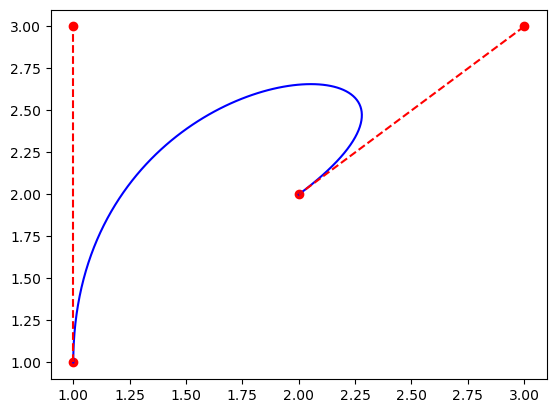

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def bezier(pt):
    """
    Return Bezier curve.

    Input:
        pt: 4x2 or 2x4 array (first two pairs - end points,
            middle two pairs - control points)
    Output:
        2x100 array (x, y coordinates) of Bezier curve.
    """
    if pt.shape == (2, 4):
        pt = pt.T
    elif pt.shape != (4, 2):
        raise ValueError('Input must be a 4x2 matrix')
    
    # parameter t from 0 to 1
    t = np.linspace(0, 1, 100)
    x = pt[:, 0]
    y = pt[:, 1]

    # main coefficients computation
    bx = 3.*(x[1] - x[0])
    cx = 3.*(x[2] - x[1]) - bx
    dx = x[3] - x[0] - bx - cx
    by = 3.*(y[1] - y[0])
    cy = 3.*(y[2] - y[1]) - by
    dy = y[3] - y[0] - by - cy

    # Bezier curve
    x = x[0] + bx*t + cx*t*t + dx*t*t*t
    y = y[0] + by*t + cy*t*t + dy*t*t*t

    return np.vstack((x, y))

pt = np.array([[1., 1.], [1., 3.], [3., 3.], [2., 2.]])

plt.plot(pt[:, 0], pt[:, 1], 'ro')
plt.plot(*bezier(pt), 'b-')
plt.plot(pt[:2,0], pt[:2,1], 'r--', pt[2:,0], pt[2:,1], 'r--')
plt.show()

<!-- 
The four points are $\left(x_1, y_1\right)=(1,1),\left(x_2, y_2\right)=(1,3),\left(x_3, y_3\right)=(3,3)$, and $\left(x_4, y_4\right)=(2,2)$. The Bézier formulas yield $b_x=0, c_x=6, d_x=-5$ and $b_y=6, c_y=$ $-6, d_y=1$. The Bézier spline
$$
\begin{aligned}
& x(t)=1+6 t^2-5 t^3 \\
& y(t)=1+6 t-6 t^2+t^3
\end{aligned}
$$ -->

**Remark** (Sauer (2017) p. 187)

- Bezier curves can be stacked to fit arbitrary function values and slopes. 
- They are an improvement over cubic splines, in the sense that the slopes at the nodes can be specified as the user wants them. 
  - In cubic splines, they are determined as the solution of system of equations. 
  - However, this freedom comes at the expense of smoothness: The second derivatives from the two different directions generally disagree at the nodes. 
  - In some applications, this disagreement is an advantage.

**Remark** (Higher order Bezier curve)

- Higher order Bezier curves are also used. In this case, more points must be given. (See [Wikipedia](https://en.wikipedia.org/wiki/B%C3%A9zier_curve#Higher-order_curves) for a bit more details.)

| 4th order Bezier curve | 5th order Bezier curve |
|---|---|
| ![4th order Bezier curve](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/B%C3%A9zier_4_big.svg/240px-B%C3%A9zier_4_big.svg.png) <br> Figure: Wikipedia | ![5th order Bezier curve](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/BezierCurve.gif/240px-BezierCurve.gif) <br> Figure: Wikipedia |